In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.6f}'.format

redfin = pd.DataFrame(pd.read_excel("redfin.xlsx"))
SI = pd.DataFrame(pd.read_excel("schoolInfo1.xlsx"))
city = pd.DataFrame(pd.read_excel("cities.xlsx"))
blank = pd.DataFrame(pd.read_excel("blank.xlsx"))
tempHigh= pd.DataFrame(pd.read_excel("weatherHigh.xlsx"))
tempLow= pd.DataFrame(pd.read_excel("weatherLow.xlsx"))
URLs = pd.DataFrame(pd.read_excel("sURL.xlsx"))

cities = ['Agoura Hills','Alhambra','Arcadia','Artesia','Avalon','Azusa','Baldwin Park','Bell','Bell Gardens','Bellflower',
          'Beverly Hills','Bradbury','Burbank','Calabasas','Carson','Cerritos','City of Industry','Claremont','Commerce','Compton','Covina','Cudahy','Culver City',
          'Diamond Bar','Downey','Duarte','El Monte','El Segundo','Gardena','Glendale','Glendora','Hawaiian Gardens','Hawthorne','Hermosa Beach','Hidden Hills','Huntington Park','Inglewood','Irwindale',
          'La Cañada Flintridge','La Habra Heights','La Mirada','La Puente','La Verne','Lakewood','Lancaster','Lawndale','Lomita','Long Beach','Los Angeles','Lynwood',
          'Malibu','Manhattan Beach','Maywood','Monrovia','Montebello','Monterey Park','Norwalk','Palmdale','Palos Verdes Estates','Paramount',
          'Pasadena','Pico Rivera','Pomona','Rancho Palos Verdes','Redondo Beach','Rolling Hills','Rolling Hills Estates','Rosemead','San Dimas','San Fernando',
          'San Gabriel','San Marino','Santa Clarita','Santa Fe Springs','Santa Monica','Sierra Madre','Signal Hill','South El Monte','South Gate','South Pasadena','Temple City',
          'Torrance','Vernon','Walnut','West Covina','West Hollywood','Westlake Village','Whittier']

In [31]:
df = blank.reset_index(drop=True)   
df['City Name'] = SI.iloc[:,0]
df['Restaurant'] = city.iloc[:,1]
df['population'] = city.iloc[:,2]
df['pCrimes'] = city.iloc[:,5]
df['vCrimes'] = city.iloc[:,3]
df['School Name'] = SI.iloc[:,1]
df['Rank'] = SI.iloc[:,2]
df['S/F Ratio'] = SI.iloc[:,4]
df['%asian'] = SI.iloc[:,6]
df['%white'] = SI.iloc[:,5]
df['%hispanic'] = SI.iloc[:,7]
df['%black'] = SI.iloc[:,8]
#final1['%indian/alaska natives'] = SI.iloc[:,9]
#final1['%Hawaiian/Pacific islander'] = SI.iloc[:,10]
#final1['total District'] = SI.iloc[:,13]
#final1['District total enroll'] = SI.iloc[:,14]

### Create an excel will all the information that I will work with

In [32]:
final2 = blank.reset_index(drop=True) 
final2['City'] = SI.iloc[:,0]
final2['#Restaurant'] = city.iloc[:,1]
final2['population'] = city.iloc[:,2]
final2['Rank'] = SI.iloc[:,2]

# city Population 

In [33]:
#final1['population'].describe()
index = blank.reset_index(drop=True)  
Apop = []
Apop.append(np.percentile(final2['population'],25))
Apop.append(np.percentile(final2['population'],75))

index['Population'] = Apop


/Users/77wu/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='population'>

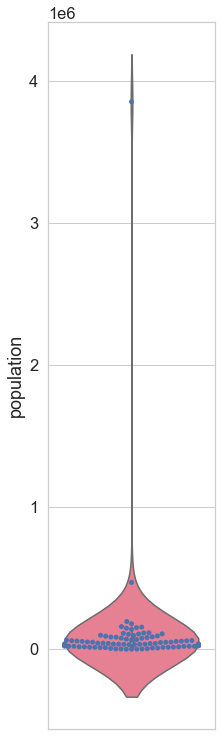

In [34]:
sns.set(rc = {'figure.figsize':(3,13)},font_scale=1.5,style = 'whitegrid')
sns.violinplot(data=final2, y="population",palette = 'husl')
sns.swarmplot(data = final2,y ="population")


# number of Restaurant 

<AxesSubplot:ylabel='#Restaurant'>

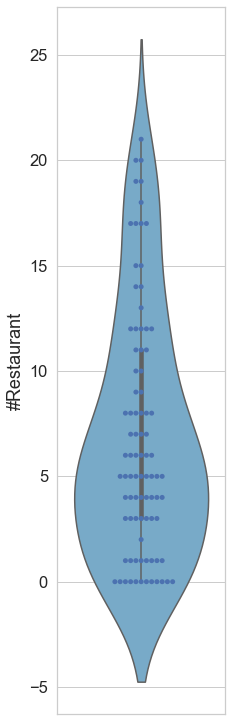

In [35]:
sns.set(rc = {'figure.figsize':(3,13)},font_scale=1.5,style = 'whitegrid')
sns.violinplot(data=final2, y="#Restaurant",palette = 'Blues')
sns.swarmplot(data = final2,y ="#Restaurant")


# House Price
### Clean up the data in Redfin.xlsx
### Redfin.xlsx contains information that I scraped from Redfin.com on the current sale house in each city

In [36]:
#drop NaNs in the redfin excel

#redfin.info()
redfin = redfin.dropna()
redfin1 = redfin.reset_index(drop=True)   
#drop rows when the price is unknown
for i in range(len(redfin1)):
    if redfin1.at[i,'price']=='Unknown':
        redfin1 = redfin1.drop([i,i])
redfin1 = redfin1.reset_index(drop=True)    
redfin1['price'] = pd.to_numeric(redfin1['price'])

for i in range(len(redfin1)):
    if redfin1.at[i,'city']=='Industry':
        redfin1.at[i,'city'] ='City of Industry'
        
#redfin1.to_excel('redfin1.xlsx', index = False)

#redfin1.info()

### Visualize the mean sale house price in LA County

In [37]:
tPrice = []
tHouse = []
for i in range(len(cities)):
    p = 0
    h = 0
    for j in range(len(redfin1)):
        if redfin1.at[j,'city'] == cities[i]:
            p = p + redfin1.at[j,'price']
            h = h + 1
       
    tPrice.append(p)
    tHouse.append(h)

#print(tPrice)
#print(tHouse)

mean = []
z = 0
for i in range(len(tPrice)):
    if tHouse[i] != 0:
        z = (tPrice[i]/tHouse[i]).round()
        mean.append(z)
    else:
        mean.append(0)
    
#print(mean)
df['avgHousePrice'] = pd.Series(mean)
final2['avgHousePrice'] = pd.Series(mean)


<AxesSubplot:xlabel='avgHousePrice'>

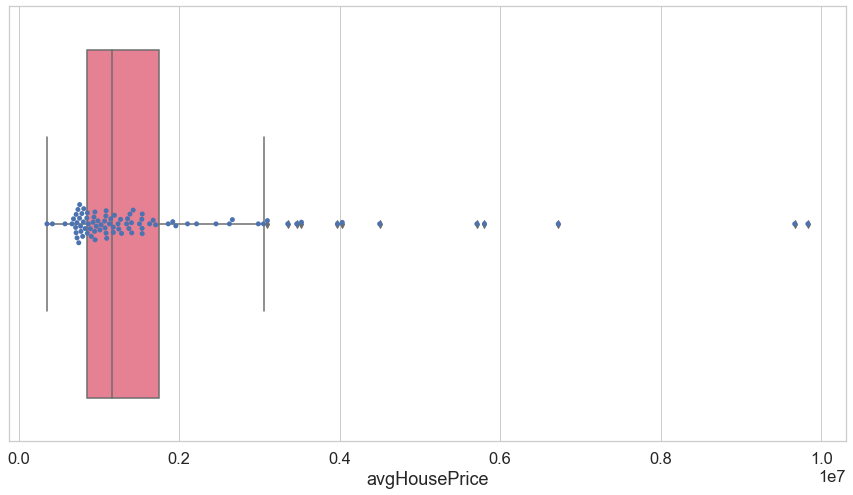

In [38]:
sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5,style = 'whitegrid')
sns.boxplot(data = final2, x ="avgHousePrice",palette = 'husl')
sns.swarmplot(data = final2, x ="avgHousePrice")
#plt.savefig('mean.png', dpi=72, bbox_inches='tight')

<AxesSubplot:ylabel='avgHousePrice'>

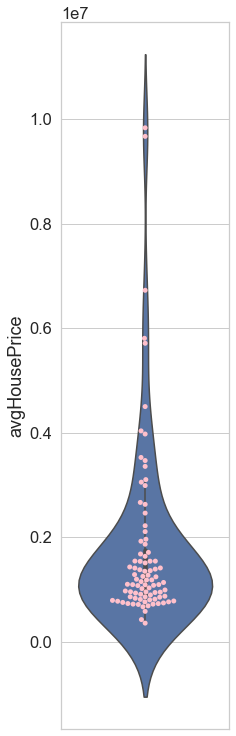

In [39]:
sns.set(rc = {'figure.figsize':(3,13)},font_scale=1.5,style = 'whitegrid')
sns.violinplot(data=final2, y="avgHousePrice", palette="deep")
sns.swarmplot(data = final2,y ="avgHousePrice", color = "pink")


In [40]:
final2['avgHousePrice'].describe()

count        88.000000
mean    1774452.113636
std     1723392.951294
min      353613.000000
25%      854907.250000
50%     1163987.000000
75%     1746115.250000
max     9832075.000000
Name: avgHousePrice, dtype: float64

In [41]:
AHP = []
AHP.append(np.percentile(final2['avgHousePrice'],25))
AHP.append(np.percentile(final2['avgHousePrice'],75))

index['avgHousePrice'] = AHP


### When the user is choosing the preference on House Price, I have 3 options for them: 
#### 1. cities that are cheaper House Price than the average : AvgHPrice < 25%(Q1) 
#### 2. cities that are more expensive house than the average:  AvgHPrice > 75%(Q3) 
#### 3. cities that are have the average house price:  25%<=AvgHPrice<=75%

# Climate
### Yearly Averge temperature in LA County (both highest and lowest) 

In [42]:
#getting the YEARLY average HIGHEST temperature in each city
m = ['Jan','Feb','March','Apr','may','June','July','Aug','Sep','Oct','Nov','Dec']
yearAvgH = []
for i in range(len(tempHigh)):
    t = 0
    for j in range(len(m)):
        t = t + tempHigh.at[i,m[j]]
               
    yearAvgH.append(round(t/12,1))
    
final2['YAvgHigh'] = pd.Series(yearAvgH)
df['YAvgHigh'] = pd.Series(yearAvgH)

#print(yearAvgH)

#getting the YEARLY average LOWEST temperature in each city
yearAvgL = []
for i in range(len(tempLow)):
    t = 0
    for j in range(len(m)):
        t = t + tempLow.at[i,m[j]]
               
    yearAvgL.append(round(t/12,1))
    
final2['YAvgLow'] = pd.Series(yearAvgL)
df['YAvgLow'] = pd.Series(yearAvgL)

#print(yearAvgL)

#creating df for the boxplot
z = ['highest','lowest']
y = []
for i in range(len(z)):
    for j in range(len(yearAvgL)):
        y.append(z[i])
x = []
for i in range(len(yearAvgH)):
    x.append(yearAvgH[i])
for i in range(len(yearAvgL)):
    x.append(yearAvgL[i])
Temp = blank.reset_index(drop=True)  

Temp['LA County Yearly Average Highest/Lowest Temperature'] = pd.Series(x)
Temp['Highest/Lowest'] = pd.Series(y)

<AxesSubplot:xlabel='LA County Yearly Average Highest/Lowest Temperature', ylabel='Highest/Lowest'>

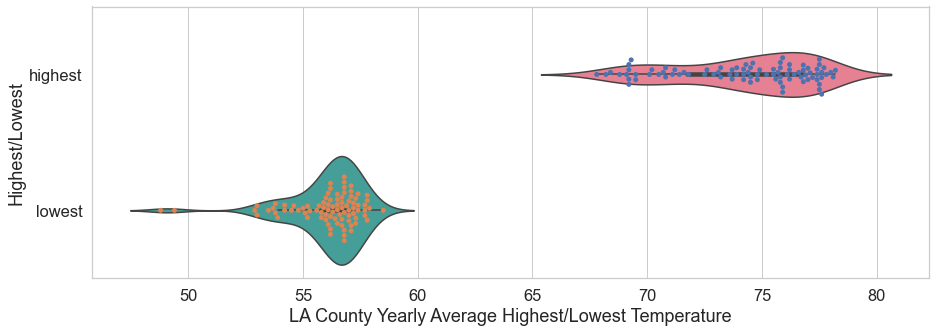

In [43]:
sns.set(rc = {'figure.figsize':(15,5)},font_scale=1.5,style = 'whitegrid')
sns.violinplot(data=Temp, x="LA County Yearly Average Highest/Lowest Temperature",y="Highest/Lowest",palette = 'husl')
sns.swarmplot(data = Temp, x ="LA County Yearly Average Highest/Lowest Temperature",y="Highest/Lowest")
#plt.savefig('climate.png', dpi=72, bbox_inches='tight')


In [44]:
#creating df for 5-number summary
Temp1 = blank.reset_index(drop=True)  
Temp1['yearlyAvgHigh'] = pd.Series(yearAvgH)
Temp1['yearlyAvgLow'] = pd.Series(yearAvgL)

#save the result in index excel

YAH = []
YAH.append(np.percentile(Temp1['yearlyAvgHigh'],25))
YAH.append(np.percentile(Temp1['yearlyAvgHigh'],75))
index['yearlyAvgHigh'] = YAH

YAL = []
YAL.append(np.percentile(Temp1['yearlyAvgLow'],25))
YAL.append(np.percentile(Temp1['yearlyAvgLow'],75))
index['yearlyAvgLow'] = YAL


### When the user is choosing the preference on temperature, I have 3 options for them: 
#### 1. cities that are colder than the average through out the year: YealyAvgHigh < 25%(Q1) & YealyAvgLow < 25%(Q1)
#### 2. cities that are warmer than the average through out the year:  YealyAvgHigh > 75%(Q3) & YealyAvgLow > 75%(Q3)
#### 3. cities that are have the average temperature through out the year:  25%<=YealyAvgHigh<=75%  &  25%<=YealyAvgLow<=75%

# Crime Rate

In [45]:
population = []
for i in range(len(df)):
    population.append(df.at[i,'population'])
#print(population)

pCrime = []
for i in range(len(df)):
    pCrime.append(df.at[i,'pCrimes'])
#print(pCrime)

vCrime = []
for i in range(len(df)):
    vCrime.append(df.at[i,'vCrimes'])
    
ratio = []
for i in range(len(pCrime)):
    ratio.append(pCrime[i]/population[i])

ratio1 = []
for i in range(len(vCrime)):
    ratio1.append(vCrime[i]/population[i])
    
final2['pCrime:pop'] = pd.Series(ratio)
final2['vCrime:pop'] = pd.Series(ratio1)
final2['pCrime:pop'].describe()


count   88.000000
mean     0.112067
std      0.600989
min      0.002120
25%      0.015734
50%      0.022705
75%      0.027931
max      5.000000
Name: pCrime:pop, dtype: float64

In [46]:
pp = []
pp.append(np.percentile(final2['pCrime:pop'],75))
pp.append(0)
index['p:p'] = pp
pv = []
pv.append(np.percentile(final2['vCrime:pop'],75))
pv.append(0)
index['v:p'] = pv

### When the user is choosing the preference on crime rate, I have 2 options for them: 
#### 1. if they want to live in a relatively safe city:  population:property crime < 75% AND population:violent crime < 75%
#### 2. if they want to live in a city that is challenging:  population:property crime >= 75%(Q3) & population:violent crime >= 75%(Q3)


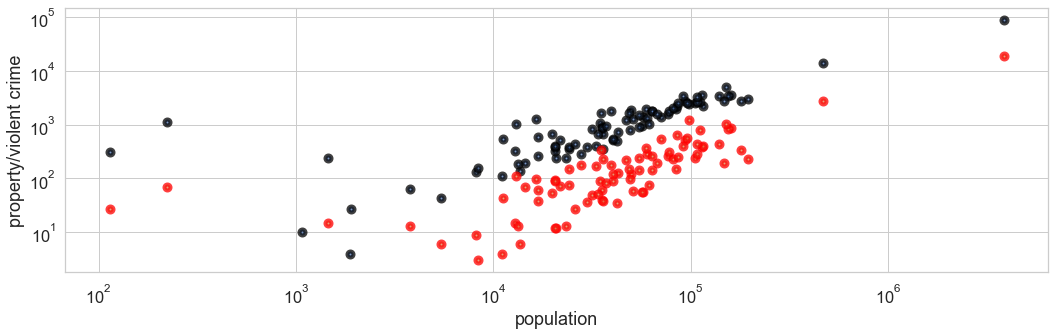

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(population,pCrime,edgecolor = 'black',linewidth = 4, alpha = 0.75)
ax1.scatter(population,vCrime,edgecolor = 'red',linewidth = 4, alpha = 0.75)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('population')
plt.ylabel('property/violent crime')
plt.tight_layout()
#plt.savefig('crimerate.png', dpi=72, bbox_inches='tight')


###  As we can see from the scatter plot, property crime rate in each city is lower than the violent crimerate
### If the user would like to live in a relatively safer place, they should avoid picking the city with less population but higher number of crime
### Therefore, I will compute the ratio between the population and the number of crime.

# Analyzing School Related Data

### calculate the standard deviation of the race at each school

In [48]:
SFRatio = []
for i in range(len(df)):
    a = df.at[i,'S/F Ratio'].split(':')
    b = a[0]
    SFRatio.append(b)
SFRatio1 = [int(i) for i in SFRatio]
asian = []
for i in range(len(df)):
    asian.append(df.at[i,'%asian'])
white = []
for i in range(len(df)):
    white.append(df.at[i,'%white'])
hispanic = []
for i in range(len(df)):
    hispanic.append(df.at[i,'%hispanic'])
    
black = []
for i in range(len(df)):
    black.append(df.at[i,'%black'])

final2['SFRatio'] = pd.Series(SFRatio1)


In [49]:
import statistics
list1 = []
list1.append(asian) 
list1.append(white) 
list1.append(hispanic) 
list1.append(black) 
std = []
for i in range(len(list1[0])):
    L = [list1[0][i],list1[1][i],list1[2][i],list1[3][i]]
    sDev = statistics.pstdev(L)
    std.append(sDev)

final2['race std'] = pd.Series(std)
#final2['race std'].describe()
#x = np.percentile(std, 25)
std1 = []
std1.append(np.percentile(final2['race std'],50))
std1.append(0)
index['Race std'] = std1
final2['race std'].describe()

count   88.000000
mean    28.049673
std      9.214363
min      9.719664
25%     20.551327
50%     26.548461
75%     36.682977
max     42.969430
Name: race std, dtype: float64

### if race std >

<AxesSubplot:>

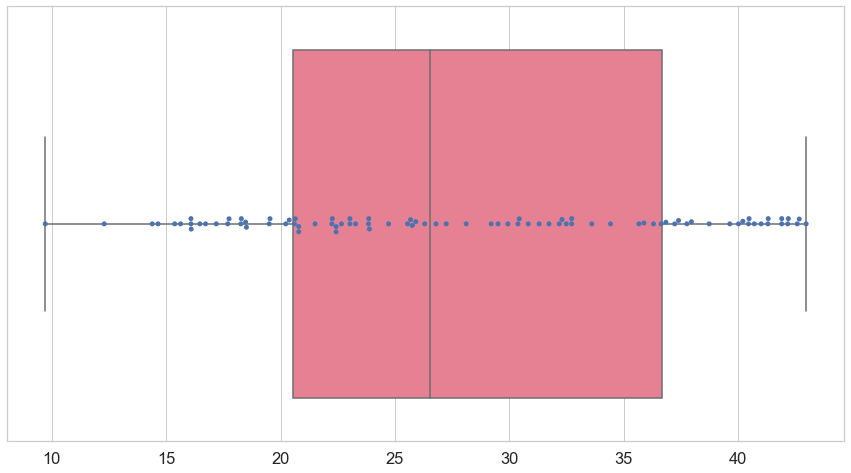

In [50]:
sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5,style = 'whitegrid')
sns.boxplot(x = std ,palette = 'husl')
sns.swarmplot( x = std)

### When the user is choosing the preference race distribution I have 2 options for them: 
#### 1. if they want the school have a relatively small race distribution :   I show them data of school with std <= 26.548
#### 2. if they want the school have a relatively big race distribution : I show them data of school with std > 26.548


In [51]:
#setting class size standard

CS = []
CS.append(np.percentile(final2['SFRatio'],25))
CS.append(np.percentile(final2['SFRatio'],75))
index['classSize'] = CS
CS[1]


25.0

In [52]:
# categorize the student facauty ratio by class sizes
#plot the race distribution by class size
S = []
M = []
L = []
SAsian = []
MAsian = []
LAsian = []
SWhite= []
MWhite = []
LWhite = []
SHispanic= []
MHispanic= []
LHispanic = []
SBlack= []
MBlack = []
LBlack = []

for i in range(len(SFRatio)):
    if SFRatio1[i] < CS[0]:
        SFRatio[i] = 'Small Class Size'
        SAsian.append(asian[i])
        SWhite.append(white[i])
        SHispanic.append(hispanic[i])
        SBlack.append(black[i])
        S.append(i)
    elif SFRatio1[i] >= CS[0] and SFRatio1[i] <= CS[1]:
        SFRatio[i] = 'Medium Class Size'
        MAsian.append(asian[i])
        MWhite.append(white[i])
        MHispanic.append(hispanic[i])
        MBlack.append(black[i])    
        M.append(i)
    elif SFRatio1[i] > CS[1]:
        SFRatio[i] = 'Large Class Size'
        LAsian.append(asian[i])
        LWhite.append(white[i])
        LHispanic.append(hispanic[i])
        LBlack.append(black[i])
        L.append(i)
        
#print(SFRatio)
final2['ClassSize'] = pd.Series(SFRatio)

x=[]
for i in range(88):
    x.append(i)


###  When the user is choosing the preference on class size, I have 3 options for them: 
#### 1. if they want to have small class size:  classsize < 21:1 (Q1)
#### 2. if they want to have medium class size: 21:1 <=classsize <= 25:1(Q3)
#### 3. if they want to have large class size: classsize > 25:1


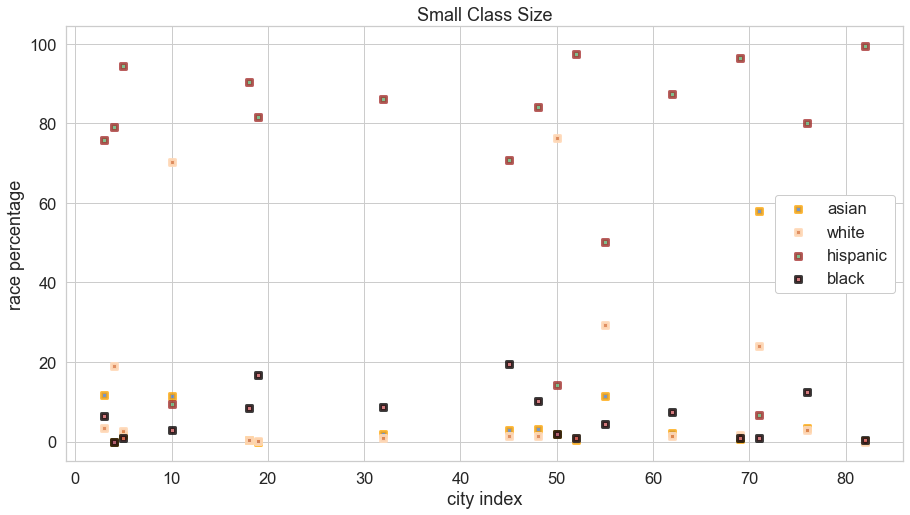

In [53]:
# plotting
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(S,SAsian,edgecolor = 'orange',linewidth = 3, alpha = 0.75,marker = 's',label='asian')
ax1.scatter(S,SWhite,edgecolor = 'peachpuff',linewidth =3, alpha = 0.9,marker = 's',label='white')
ax1.scatter(S,SHispanic,edgecolor = 'brown',linewidth = 3, alpha = 0.75,marker = 's',label='hispanic')
ax1.scatter(S,SBlack,edgecolor = 'black',linewidth = 3, alpha = 0.75,marker = 's', label='black')
plt.xlabel('city index')
plt.ylabel('race percentage')
plt.title("Small Class Size")
plt.legend(framealpha = 1, frameon=True)
#plt.savefig('small.png', dpi=72, bbox_inches='tight')


Text(0.5, 1.0, 'Medium Class Size')

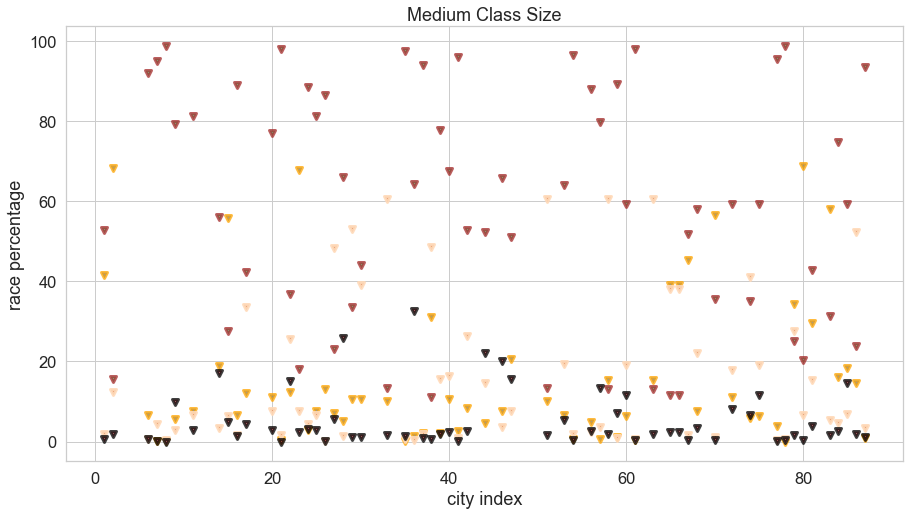

In [54]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(M,MAsian,edgecolor = 'orange',linewidth = 3, alpha = 0.75,marker = 'v')
ax2.scatter(M,MWhite,edgecolor = 'peachpuff',linewidth = 3, alpha = 0.9,marker = 'v')
ax2.scatter(M,MHispanic,edgecolor = 'brown',linewidth = 3, alpha = 0.75,marker = 'v')
ax2.scatter(M,MBlack,edgecolor = 'black',linewidth = 3, alpha = 0.75,marker = 'v')
plt.xlabel('city index')
plt.ylabel('race percentage')
plt.title("Medium Class Size")
#plt.savefig('medium.png', dpi=72, bbox_inches='tight')


Text(0.5, 1.0, 'Large Class Size')

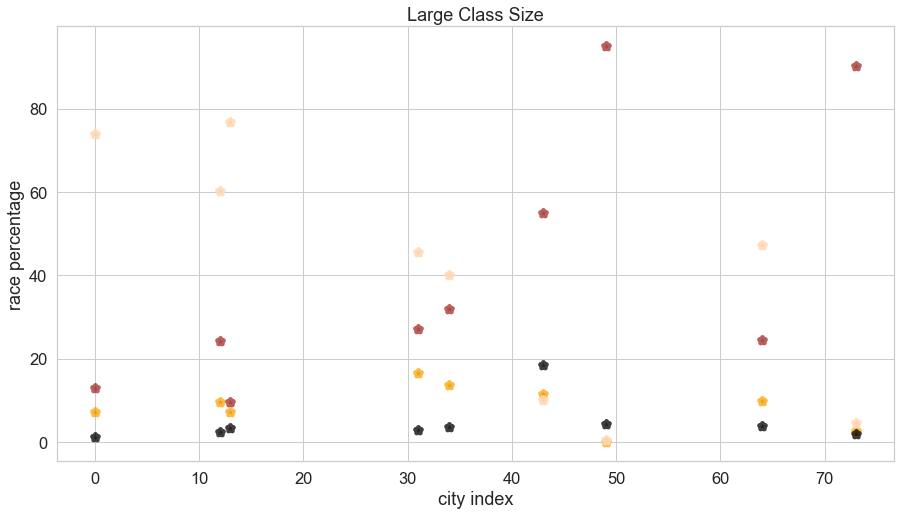

In [55]:
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.scatter(L,LAsian,edgecolor = 'orange',linewidth = 5, alpha = 0.75,marker = '*')
ax3.scatter(L,LWhite,edgecolor = 'peachpuff',linewidth = 5, alpha = 0.9,marker = '*')
ax3.scatter(L,LHispanic,edgecolor = 'brown',linewidth = 5, alpha = 0.75,marker = '*')
ax3.scatter(L,LBlack,edgecolor = 'black',linewidth = 5, alpha = 0.75,marker = '*')
plt.xlabel('city index')
plt.ylabel('race percentage')
plt.title("Large Class Size")
#plt.savefig('large.png', dpi=72, bbox_inches='tight')


## The above graphs are a visual representation of the student diversity under three different class sizes

In [56]:
final1 = blank.reset_index(drop=True)   
final1['City'] = df.iloc[:,0]
final1['AHP'] = df.iloc[:,12]
final1['Rest.'] = df.iloc[:,1]
final1['Population'] = df.iloc[:,2]
final1['YAvgH'] = df.iloc[:,13]
final1['YAvgL'] = df.iloc[:,14]
final1['pCrimes'] = df.iloc[:,3]
final1['vCrimes'] = df.iloc[:,4]
final1['School'] = df.iloc[:,5]
final1['Rank'] = df.iloc[:,6]
final1['S/F Ratio'] = df.iloc[:,7]
final1['%asian'] = df.iloc[:,8]
final1['%white'] = df.iloc[:,9]
final1['%black'] = df.iloc[:,11]
final1['%hispanic'] = df.iloc[:,10]
#pd.set_option('display.precision', 2)
final1.head()

,City,AHP,Rest.,Population,YAvgH,YAvgL,pCrimes,vCrimes,School,Rank,S/F Ratio,%asian,%white,%black,%hispanic
0,Agoura Hills,1506148.000000,4,20667,69.500000,53.000000,236,12,Agoura High School,461,26:1,7.100000,73.900000,1.300000,13.000000
1,Alhambra,1131371.000000,21,84469,76.200000,56.200000,1919,149,Alhambra High School,211,24:1,41.700000,2.000000,0.600000,52.700000
2,Arcadia,2663143.000000,19,57295,77.100000,56.100000,1388,57,Arcadia High School,133,25:1,68.300000,12.300000,2.000000,15.500000
3,Artesia,717166.000000,8,16793,74.500000,56.100000,262,60,Artesia High School,741,20:1,11.600000,3.400000,6.300000,75.900000
4,Avalon,1535322.000000,1,3795,67.800000,58.500000,64,13,Avalon K-12,755,17:1,0.000000,19.100000,0.000000,79.200000


In [57]:
final1 = final1.to_excel('final1.xlsx', index = False)
final2['sURL'] = URLs.iloc[:,0]
final2['mURL'] = URLs.iloc[:,2]
final2 = final2.to_excel('final2.xlsx', index = False)
index = index.to_excel('index.xlsx', index = False)
#df = df.to_excel('df.xlsx', index = False)
